In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from preprocessing_data.utils import format_Dataframes, preprocessing_dataframe, remove_outliers, winsorize_dataframe

In [2]:
!pip install scipy

In [3]:
df = format_Dataframes(data_path="D:\-DSP391m-Forecasting-Financial-Time-Series-With-Transformer\craw_data\FPT_stock.xlsx", type_file="xlsx")
df.head(10)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
0,FPT,2024-05-21,136.0,--,3(2.26,3(2.26%),%),NaN,467.06,734.400,99.45,134.0,136.0,133.5
1,FPT,2024-05-20,133.0,--,-1.5(-1.12,-1.5(-1.12%),%),NaN,270.50,NaN,152.86,135.2,136.1,133.0
2,FPT,2024-05-17,134.5,--,-0.9(-0.66,-0.9(-0.66%),%),NaN,310.27,642.601,86.43,135.4,136.0,133.7
3,FPT,2024-05-16,135.4,--,1.3(0.97,1.3(0.97%),%),NaN,423.78,924.900,119.98,135.6,137.3,134.2
4,FPT,2024-05-15,134.1,--,3.6(2.76,3.6(2.76%),%),NaN,485.07,NaN,139.80,131.5,134.5,131.3
5,FPT,2024-05-14,130.5,--,0.8(0.62,0.8(0.62%),%),NaN,300.96,847.300,113.19,130.0,131.7,129.6
6,FPT,2024-05-13,129.7,--,-1.3(-0.99,-1.3(-0.99%),%),NaN,240.66,NaN,336.62,131.3,131.5,128.8
7,FPT,2024-05-10,131.0,--,0.7(0.54,0.7(0.54%),%),NaN,494.17,0.000,0.00,131.3,132.2,129.2
8,FPT,2024-05-09,130.3,--,-0.7(-0.53,-0.7(-0.53%),%),NaN,288.30,838.300,111.35,130.6,132.8,130.0
9,FPT,2024-05-08,131.0,--,-0.3(-0.23,-0.3(-0.23%),%),NaN,392.62,759.700,104.94,130.1,131.0,129.3


In [4]:
df.tail(10)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
4333,FPT,2006-12-26,459.0,2024-03-15 00:00:00,21(4.79,21(4.79%),%),300.15,0.13,20.0,0.01,417.0,459.0,417.0
4334,FPT,2006-12-25,438.0,2024-06-14 00:00:00,-23(-4.99,-23(-4.99%),%),22.14,0.01,30.0,0.01,438.0,438.0,438.0
4335,FPT,2006-12-22,461.0,15.37,-24(-4.95,-24(-4.95%),%),143.50,0.07,10.0,0.00,461.0,461.0,461.0
4336,FPT,2006-12-21,485.0,16.17,-25(-4.90,-25(-4.90%),%),156.40,0.08,0.0,0.00,501.0,501.0,485.0
4337,FPT,2006-12-20,510.0,17,24(4.94,24(4.94%),%),220.12,0.11,0.0,0.00,510.0,510.0,510.0
4338,FPT,2006-12-19,486.0,2024-02-16 00:00:00,23(4.97,23(4.97%),%),137.52,0.07,0.0,0.00,486.0,486.0,486.0
4339,FPT,2006-12-18,463.0,15.44,22(4.99,22(4.99%),%),215.79,0.10,10.0,0.00,463.0,463.0,463.0
4340,FPT,2006-12-15,441.0,2024-07-14 00:00:00,21(5.00,21(5.00%),%),265.30,0.12,30.0,0.01,441.0,441.0,441.0
4341,FPT,2006-12-14,420.0,14,20(5.00,20(5.00%),%),280.71,0.12,96.0,0.04,420.0,420.0,420.0
4342,FPT,2006-12-13,400.0,13.34,0(0.00,0(0.00%),%),83.53,0.03,0.0,0.00,400.0,400.0,400.0


In [5]:
df = preprocessing_dataframe(df)
df

,Đóng cửa,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
Ngày,,,,,,,,
2006-12-13,0.581160,0.083545,0.000035,0.000000,0.000000,0.581226,0.574601,0.581292
2006-12-14,0.612771,0.280761,0.000142,0.096823,0.000049,0.612832,0.605881,0.612893
2006-12-15,0.645962,0.265348,0.000142,0.030257,0.000012,0.646018,0.638724,0.646074
2006-12-18,0.680733,0.215829,0.000118,0.010086,0.000000,0.680784,0.673131,0.680834
2006-12-19,0.717086,0.137545,0.000083,0.000000,0.000000,0.717130,0.709102,0.717175
...,...,...,...,...,...,...,...,...
2024-05-15,0.160898,0.386191,0.572746,0.099514,0.170915,0.156922,0.159368,0.156739
2024-05-16,0.162952,0.386191,0.500378,0.932829,0.146684,0.163401,0.163747,0.161321
2024-05-17,0.161530,0.386191,0.366351,0.648110,0.105667,0.163085,0.161714,0.160531


In [6]:
df_part2 = df.iloc[-720:]
df_part2

,Đóng cửa,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
Ngày,,,,,,,,
2021-07-01,0.089458,0.386191,0.177726,0.000000,0.000000,0.088338,0.088051,0.088324
2021-07-02,0.094199,0.386191,0.413593,0.035300,0.004071,0.090234,0.093682,0.089746
2021-07-05,0.095464,0.386191,0.320018,0.099514,0.416896,0.099241,0.097591,0.093064
2021-07-06,0.086455,0.386191,0.283037,0.099514,0.143395,0.095291,0.094464,0.086744
2021-07-07,0.091987,0.386191,0.509800,0.099514,0.144618,0.086599,0.091336,0.083584
...,...,...,...,...,...,...,...,...
2024-05-15,0.160898,0.386191,0.572746,0.099514,0.170915,0.156922,0.159368,0.156739
2024-05-16,0.162952,0.386191,0.500378,0.932829,0.146684,0.163401,0.163747,0.161321
2024-05-17,0.161530,0.386191,0.366351,0.648110,0.105667,0.163085,0.161714,0.160531


In [7]:
def plot_price_changes(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    sns.lineplot(x='Ngày', y='Đóng cửa', data=df, label='Giá đóng cửa')
    sns.lineplot(x='Ngày', y='Mở cửa', data=df, label='Giá mở cửa')
    plt.title('Sự thay đổi của giá đóng và giá mở theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

In [8]:
def plot_trading_volume(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    sns.lineplot(x='Ngày', y='Khối lượng (Khớp lệnh)', data=df, label='Khối lượng (Khớp lệnh)')
    sns.lineplot(x='Ngày', y='Khối lượng (Thỏa thuận)', data=df, label='Khối lượng (Thỏa thuận)')
    plt.title('Sự thay đổi của khối lượng giao dịch khớp lệnh và thỏa thuận theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Khối lượng')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

In [9]:
def plot_price_range(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    df['Chênh lệch giá'] = df['Cao nhất'] - df['Thấp nhất']
    sns.lineplot(x='Ngày', y='Chênh lệch giá', data=df)
    plt.title('Sự chênh lệch giữa giá cao nhất và thấp nhất theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Chênh lệch giá')
    plt.xticks(rotation=45) 
    plt.tight_layout() 
    plt.show()


In [10]:
def plot_stock_data_boxplot(df):
    required_columns = [
        'Đóng cửa', 'Khối lượng (Khớp lệnh)', 'Giá trị (Khớp lệnh)', 
        'Khối lượng (Thỏa thuận)', 'Giá trị (Thỏa thuận)', 
        'Mở cửa', 'Cao nhất', 'Thấp nhất'
    ]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"DataFrame thiếu cột cần thiết: {col}")
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[required_columns])
    plt.title('Box Plot cho các cột giá cổ phiếu')
    plt.ylabel('Giá trị')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
def plot_correlation_heatmap(df: pd.DataFrame) -> None:
    numeric_cols = df.select_dtypes(include=['float64']).columns
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Biểu đồ heatmap của mối tương quan giữa các biến')
    plt.show()

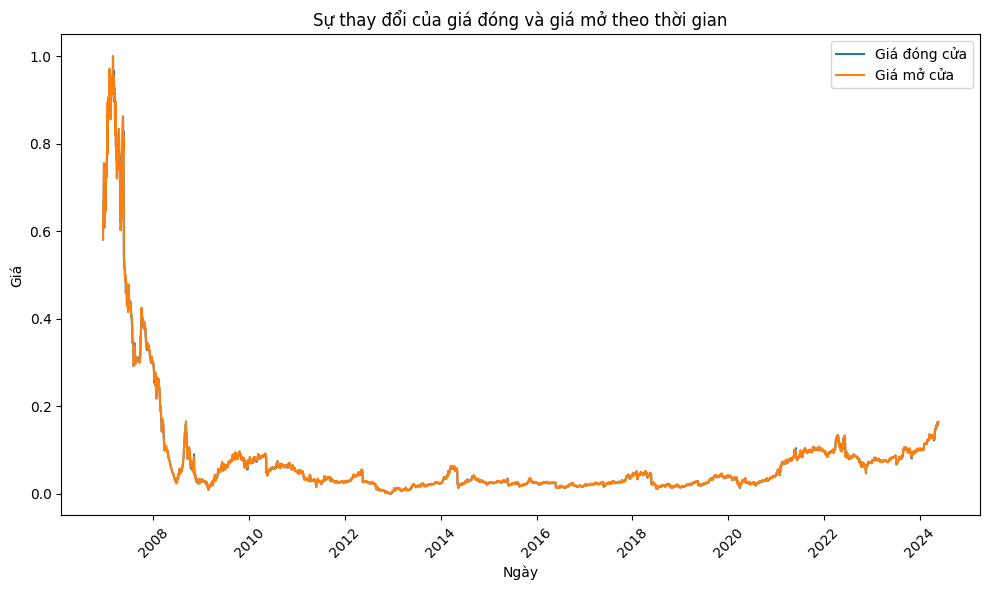

In [12]:
plot_price_changes(df)

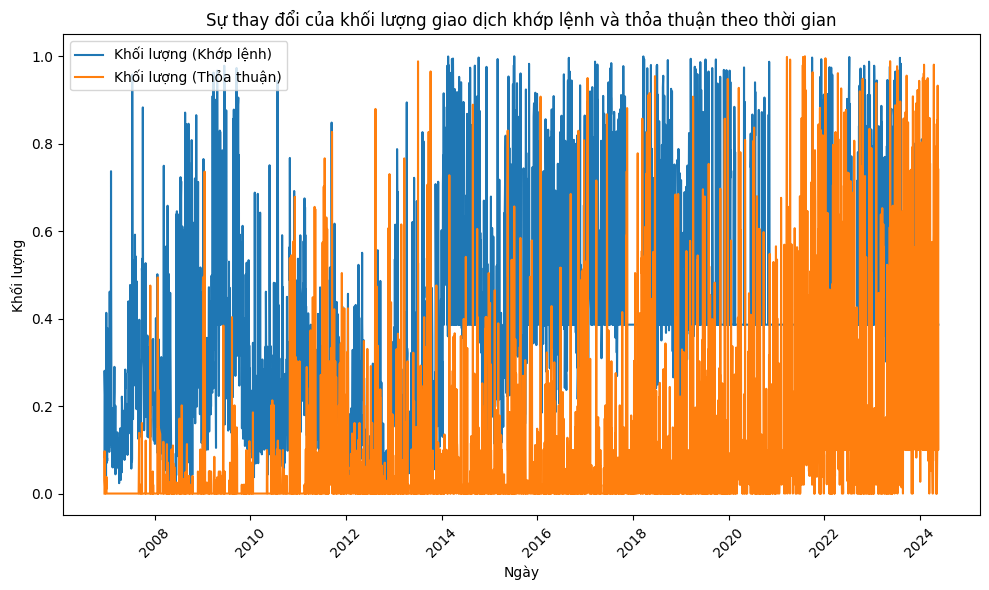

In [13]:
plot_trading_volume(df)

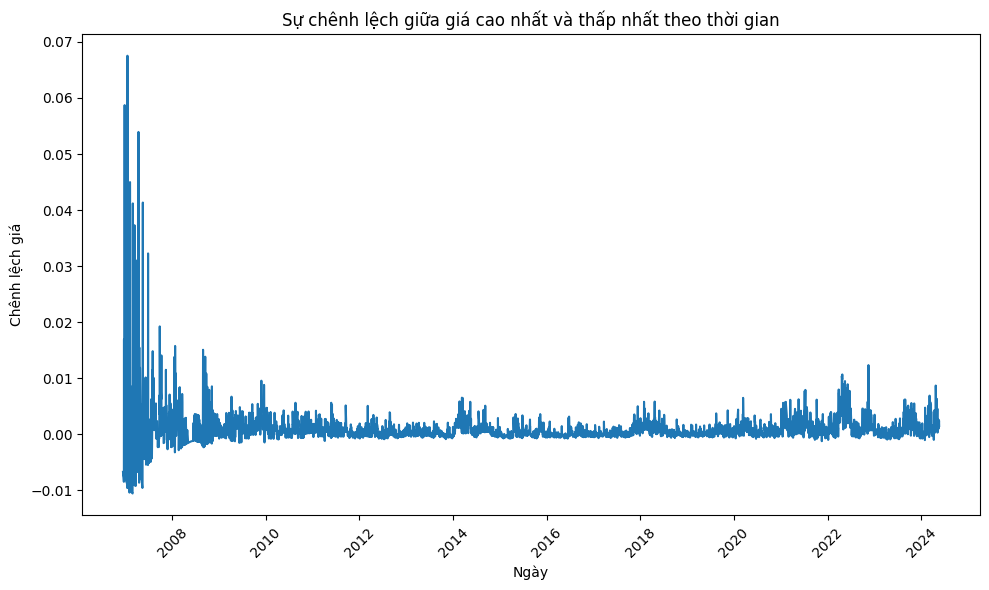

In [14]:
plot_price_range(df)

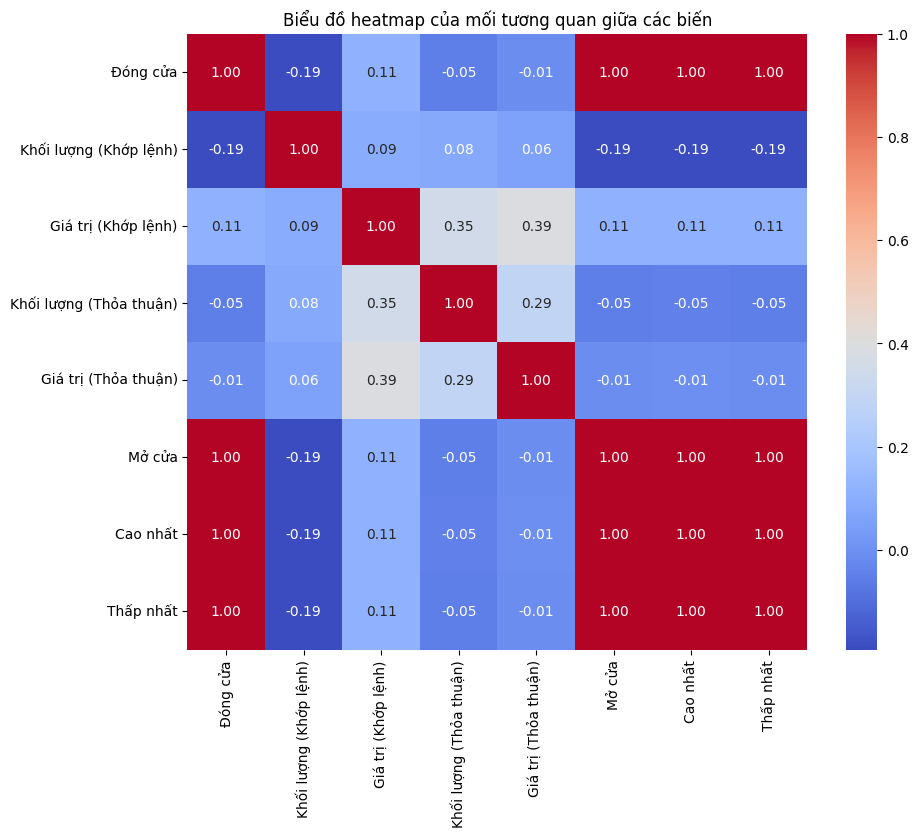

In [15]:
plot_correlation_heatmap(df)

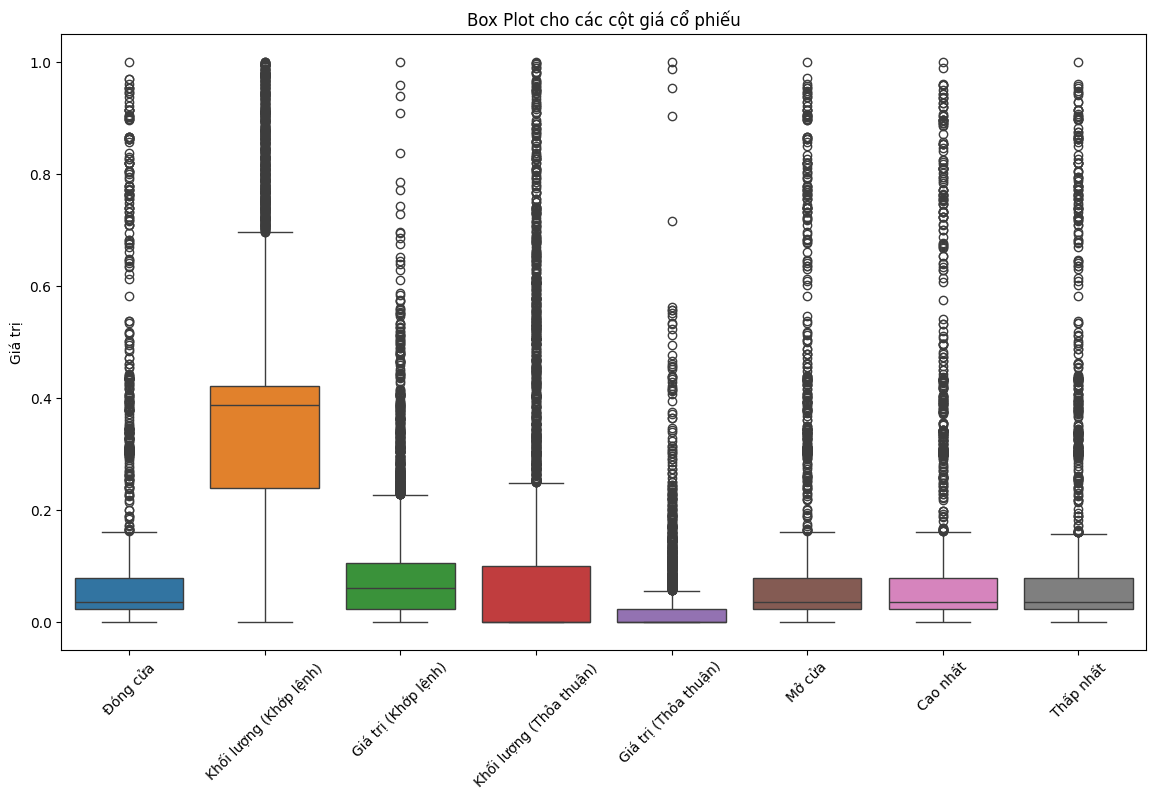

In [16]:
plot_stock_data_boxplot(df)

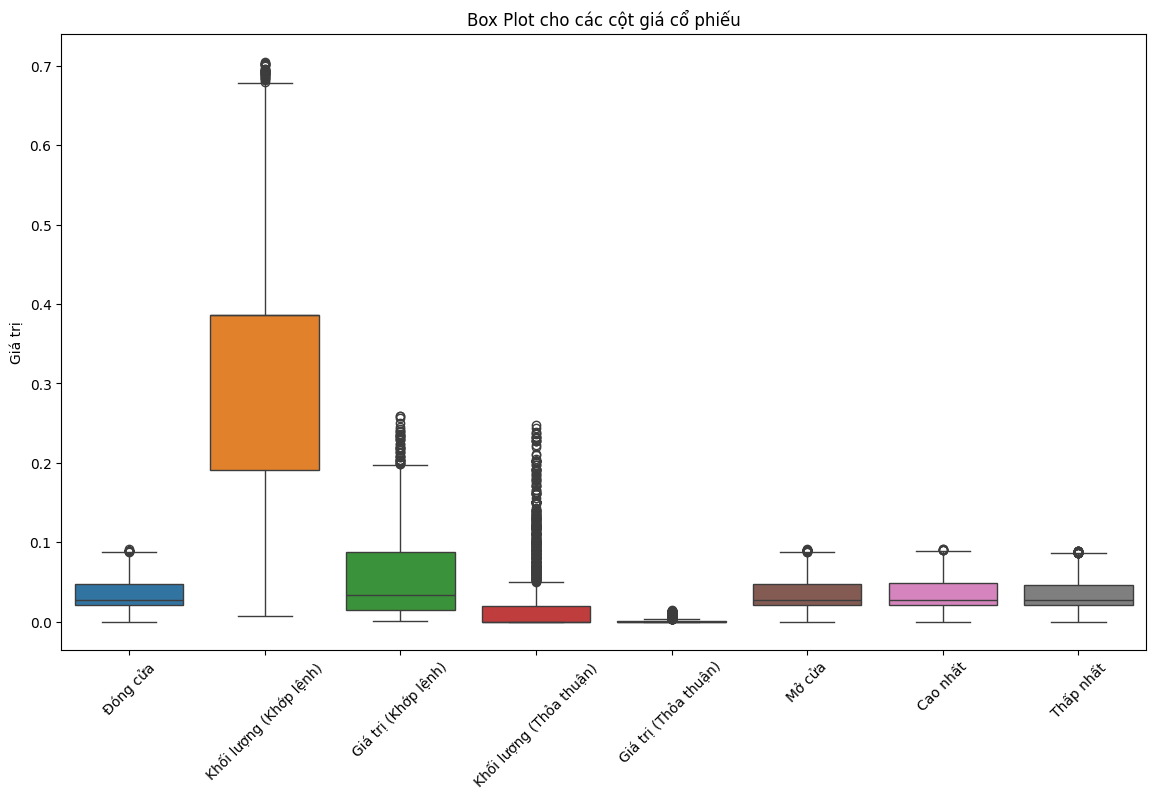

In [17]:
df1 = remove_outliers(df)
plot_stock_data_boxplot(df1)

In [18]:
df2 = winsorize_dataframe(df)
plot_stock_data_boxplot(df2)

AttributeError: 'DataFrame' object has no attribute 'dtype'